<a href="https://colab.research.google.com/github/JuanDa-Machine/Unsupervised_Package/blob/master/clustering_JD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab II - Clustering - Workshop II
Machine Learning II


##By: JUAN DAVID CEBALLOS SANCHEZ - **JD** 

##1. Spectral Clustering

von Luxburg, U. A tutorial on spectral clustering. Stat Comput 17, 395–416 (2007). https://doi.org/10.1007/s11222-007-9033-z

#### a. When to use?

Spectral Clustering trabaja y presenta resultados muy positivos en datasets de tamaño grande, claro, tener en cuenta que los datos deben presentar cierta separabilidad entre ellos y para ello se debe elegir el gráfico correcto. Lo dificil es elegir el gráfico, luego de ello el problema se resuelve con un nivel menor ya que de muchas dimensiones se pasa a un problema lineal. Sus resultados son mejores que otros enfoques.

El propósito de clustering es lograr una separación de puntos en diferentes grupos de acuerdo a sus similitudes (normalmente es la media o mediana). Para un conjunto de datos en forma de gráfico similar, el problema de clustering puede ser replanteado de la siguente manera:  encontrar una separación del gráfico tal que sus diferentes partes tengan un peso muy bajo, es decir, que los clusters sean diferentes entre ellos, y que los puntos entre cada grupo tenga un peso alto es decir que cada uno de estos puntos este cerca o sea lo más parecido posible a este cluster al que pertenece. 

EL agrupamiento espectral trata de dar solución a problemas como que la clusterización sea caracterizada porque cada uno de los agrupamientos logrados tenga suficiente cantidad de datos (solucionar el mincut, ver también NCut y RatioCut).

Otro acercamiento que se ha propuesto es la Caminata Aleatoria (Random Walk) que propone un enfoque similar al de la partición entre grupos en la que la caminata sea larga mientras sea entre los puntos del mismo cluster y un salto poco frecuente a un cluster ajeno.

#### b. Math fundamentals

Principalmente se basa en Matrices gráficas Laplacianas.
Caminatas aleatorias (procesos estocásticos)
K-vecinos más cercanos
E-vecindarios gráfico

Las anteriores estan conectadas a través de la "commute" distance que también es llamada la distancia de resistencia y se mediría, la distancia entre dos grupos, como el número de veces que toma ir de un punto al otro y volver al punto inicial.

#### c. Computing Spectral Clustering

En la práctica, se calcula el (los) primer(os) k eigenvectores de un gran potencial matrix gráfica de Laplace. Una ventaja es que si se usa el gráfico de los k-vecinos más cercanos o el gráfico de los e-vecindarios, todas las matrices estarán dispersas. Otros métodos eficientes de lograr lo anterior es usar Krylov subspace y em método de Lanczos(Golub and Van Loan, 1996). La velocidad de convergencia de éstos algorítmos depende de el tamaño del eigengap (también llamado distancia spectral) $γk = |λk−λk+1|$. Entre más grande es la distancia especrtral, más rápido el algoritmo computa el primer k eigenvector en converger.

#### d. Spectral Clustering and PCA

La relación entre estos se basa en que los vectores propios más pequeños de los gráficos Laplacianos tamnbién se pueden interpretar como los vectores propios más grandes de las matrices kernel (matrices de Gram).



##2. DBSCAN

[MLA 011 Practical Clustering](https://open.spotify.com/episode/1m6OBcdljs5JdcbPWB2Ngb?si=ea8cb0a986ce43d4), nov 2020. Spotify.
También en: https://ocdevel.com/mlg/mla-11


#### a. When to use

Cuando no se tiene referencia o idea preliminar de cuántos clusters se podrían encontrar. 
Es un buen método para usar cuando se tiene presencia de valores outliers.

#### b. Math fundamentals

DBSCAN creates a circle of epsilon radius around every data point and classifies them into Core point, Border point, and Noise. A data point is a Core point if the circle around it contains at least ‘minPoints’ number of points. If the number of points is less than minPoints, then it is classified as Border Point, and if there are no other data points around any data point within epsilon radius, then it treated as Noise.


#### c. DBSCAN and Spectral Clustering relationship


There is a connection (not an equivalence) between densitybased DBSCAN clustering, matrix factorization, and spectral clustering: the clusters found by DBSCAN correspond (except for border and noise points) to optimal cuts of the neighborhood graph of the core points only, and hence, to spectral clusters.

While this does not yield a faster clustering algorithm – computing the graph is as expensive as running DBSCAN – the theoretical relationship of these methods is interesting.

##3. Elbow method in clustering

It is a technique commonly used to determine the optimal number of clusters in a clustering algorithm. The elbow method is based on the idea that as the number of clusters increases, the variation within each cluster decreases. However, as more clusters are added, the benefit of a further reduction in within-cluster variation diminishes.

In the elbow method, the value of an evaluation metric (for example, the sum of the squares of the intra-cluster distances) is calculated for different values of k (the number of clusters). Then, the value of the evaluation metric is plotted as a function of k. The graph should have an "elbow" or curve shape that resembles a bent arm, suggesting that there is a point where increasing the number of clusters no longer provides a significant improvement in the evaluation metric.
The goal of the elbow method is to identify the number of clusters that produce the "elbow" in the curve, which indicates the point where there is a significant decrease in the improvement of the evaluation metric. This number of clusters is considered the optimal number of clusters for the clustering algorithm.

##### Some flaws

* It does not take into account the distribution of the data: The elbow method does not take into account the distribution of the data, which means that it cannot be effective in identifying the optimal number of clusters in data with complex distributions. In such cases, it may be necessary to use more advanced evaluation techniques.
* Depends on choice of evaluation metric: The elbow method depends on the choice of evaluation metric used to calculate the quality of the clusters. Choosing an incorrect metric can lead to the selection of a suboptimal number of clusters.
* Can be subjective: The identification of the inflection point in the elbow method curve can be subjective and dependent on the interpretation of the user. In some cases, it can be difficult to determine if the curve has a clear inflection point.
* Can be misleading on data with overlapping clusters: The elbow method can be misleading on data with overlapping or irregularly shaped clusters. In such cases, it can be difficult to identify a clear inflection point in the curve.

##4. Upgrading ***Unsupervised***!

#### Importing the libraries and packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/Unsupervised_Package')
from packages.main import kmeans, kmedoids

##5. Testing ***Unsupervised***!

##### Scattering data X

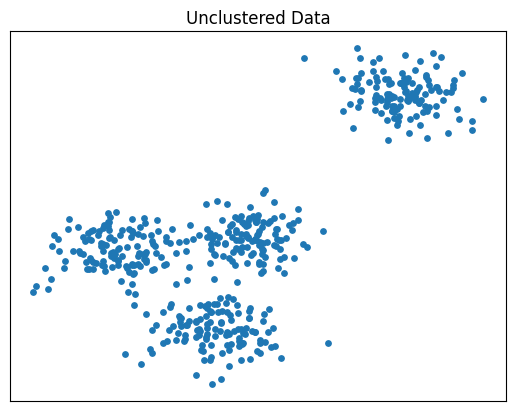

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Specifying the number of cluster our data should have
n_components = 4


X, true_labels = make_blobs(
n_samples=500,
n_features=2,
centers=4,
cluster_std=1,
center_box=(-10.0, 10.0),
shuffle=True,
random_state=1,
)

plt.title("Unclustered Data")
plt.scatter(X[:, 0], X[:, 1], s=15)
plt.xticks([])
plt.yticks([])
plt.show()

##### KMeans

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5654587059771561
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5285156051803089
For n_clusters = 6 The average silhouette_score is : 0.44617601939048596


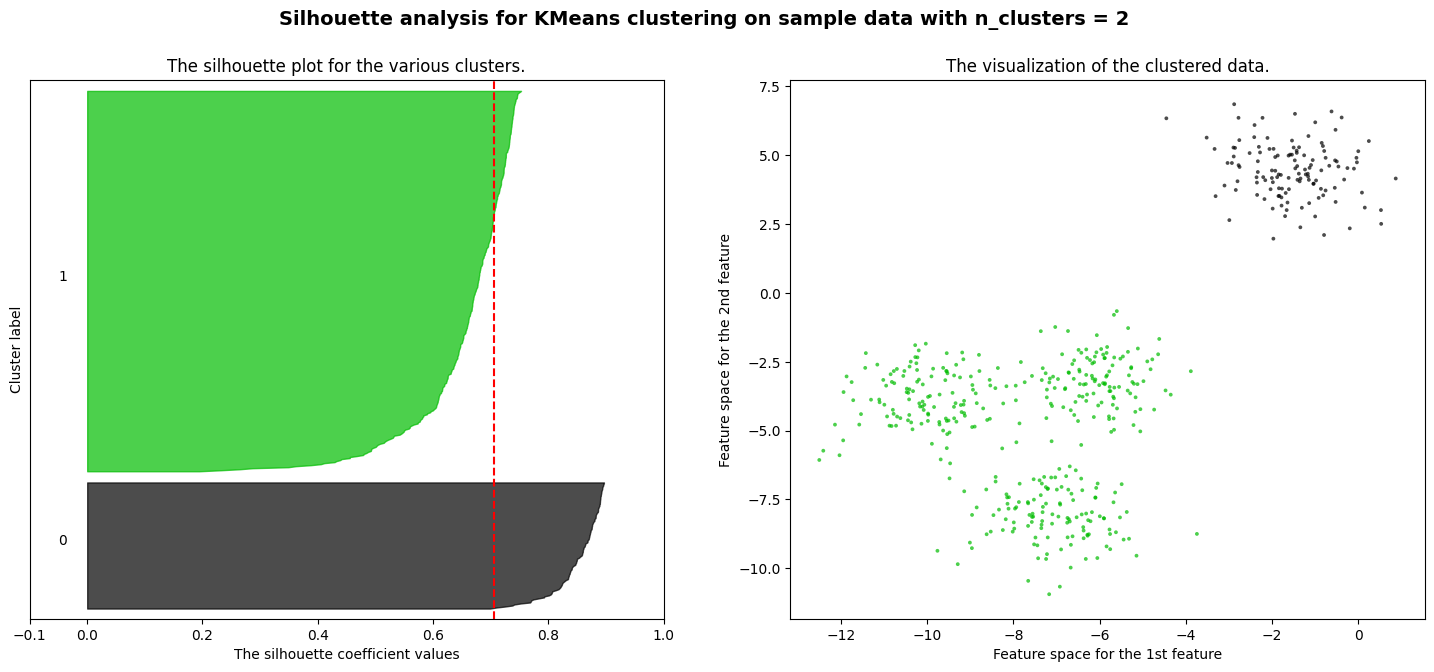

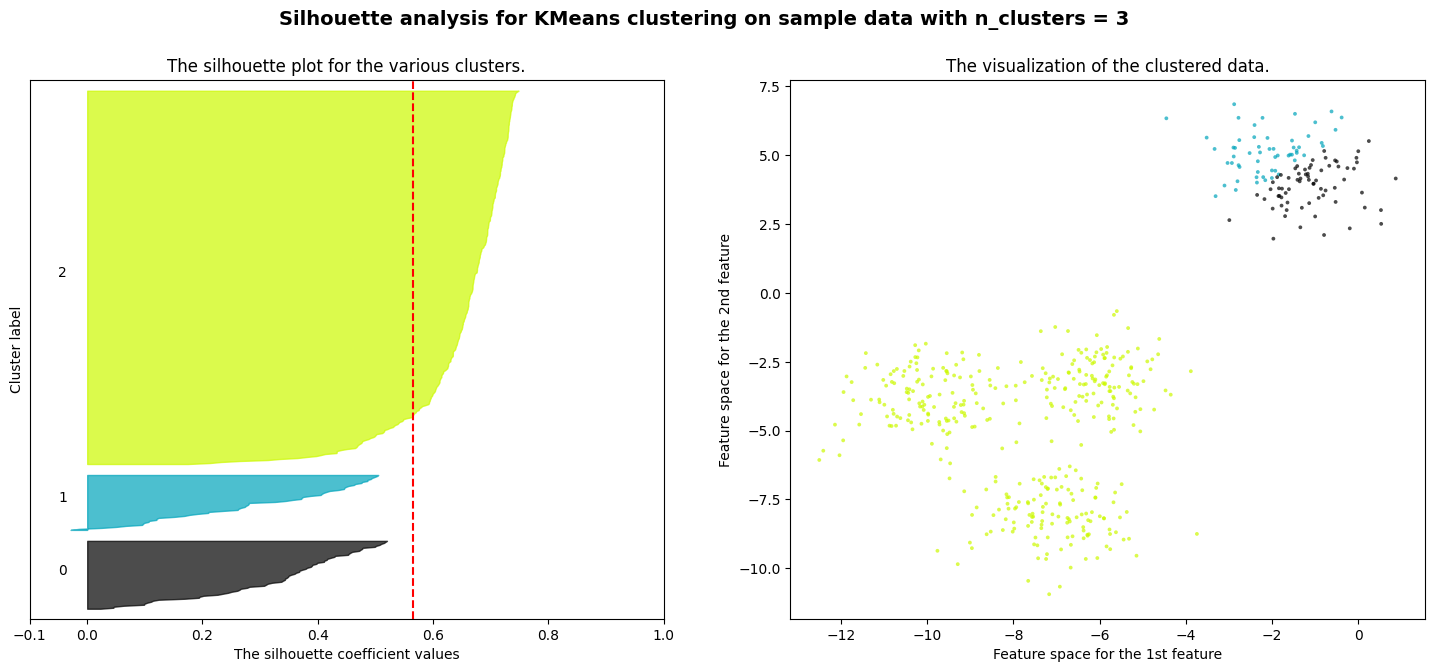

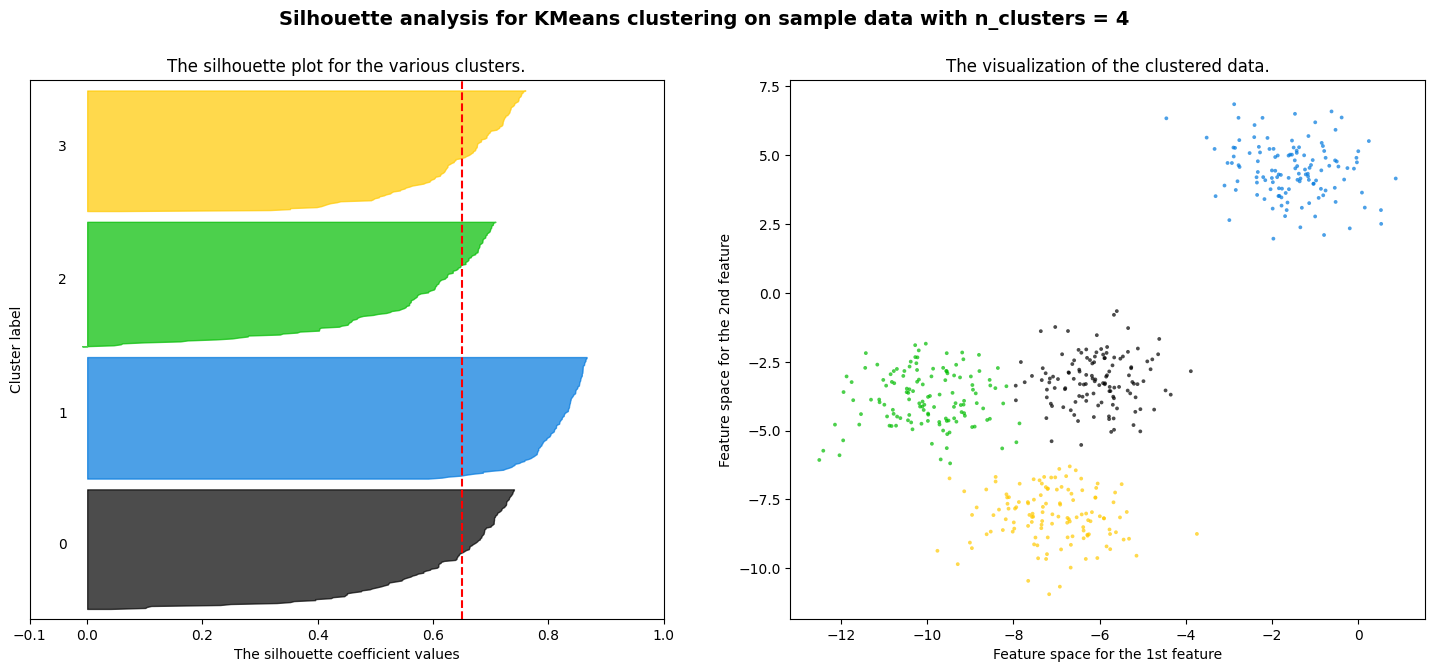

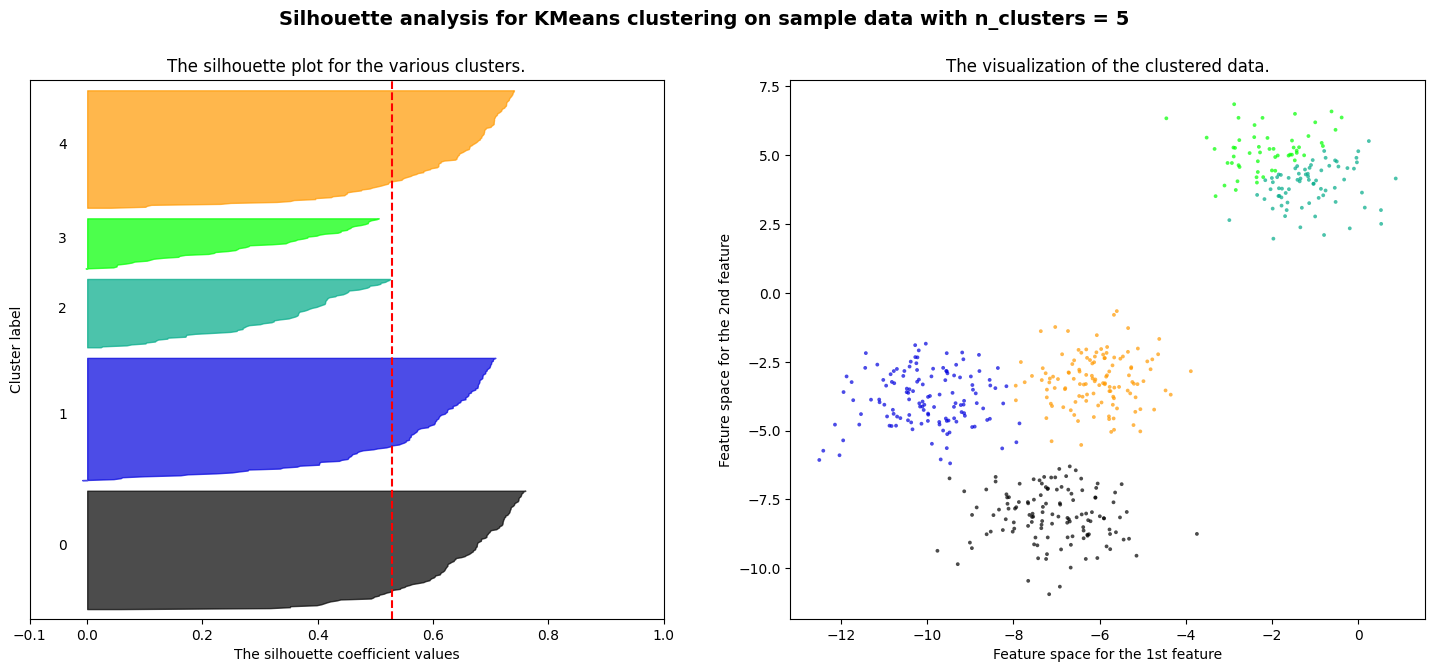

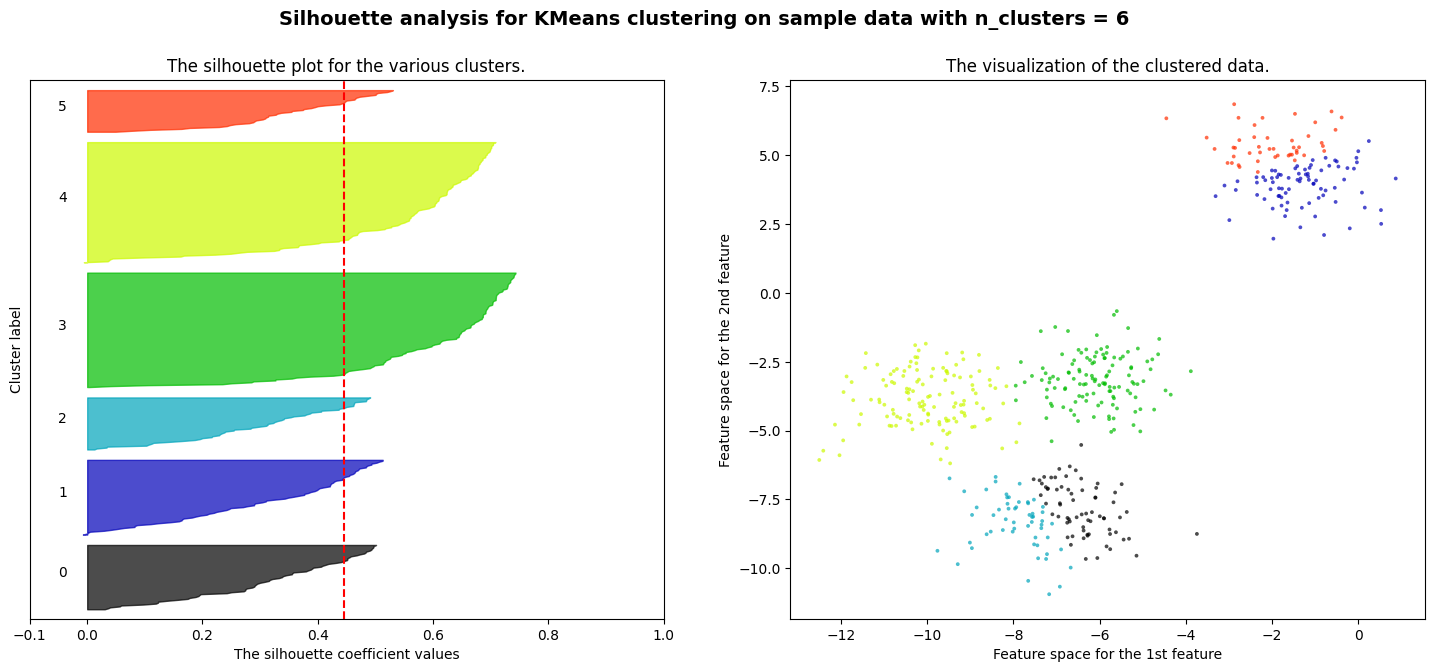

In [4]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = kmeans.KMeans(n_clusters=n_clusters)
    clusterer.fit(X)
    cluster_labels = clusterer.predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

The best K for clustering in this case is 4 because all of the groups are covered by the sil. coefficient, when less or more clusters results are not that accurate. In the scatter we can check this result

##### KMediods

For n_clusters = 2 The average silhouette_score is : 0.44617601939048596
For n_clusters = 3 The average silhouette_score is : 0.44617601939048596
For n_clusters = 4 The average silhouette_score is : 0.44617601939048596
For n_clusters = 5 The average silhouette_score is : 0.44617601939048596
For n_clusters = 6 The average silhouette_score is : 0.44617601939048596


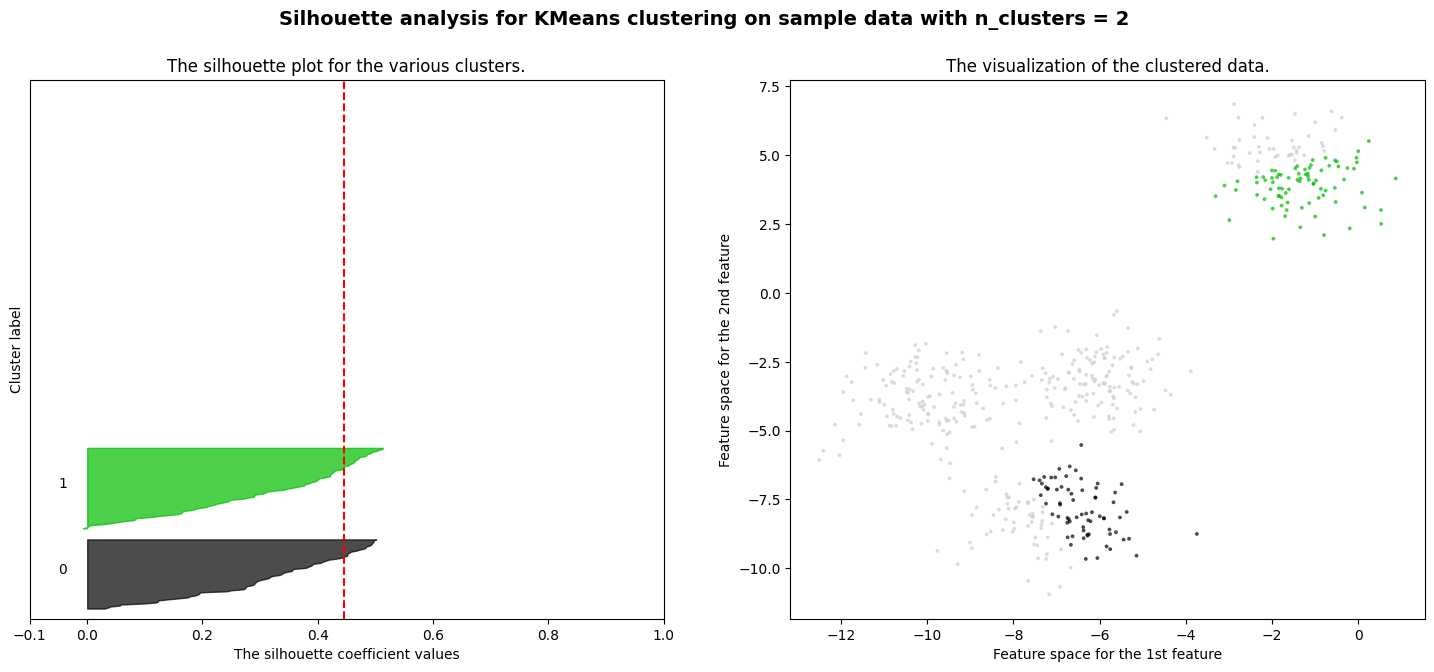

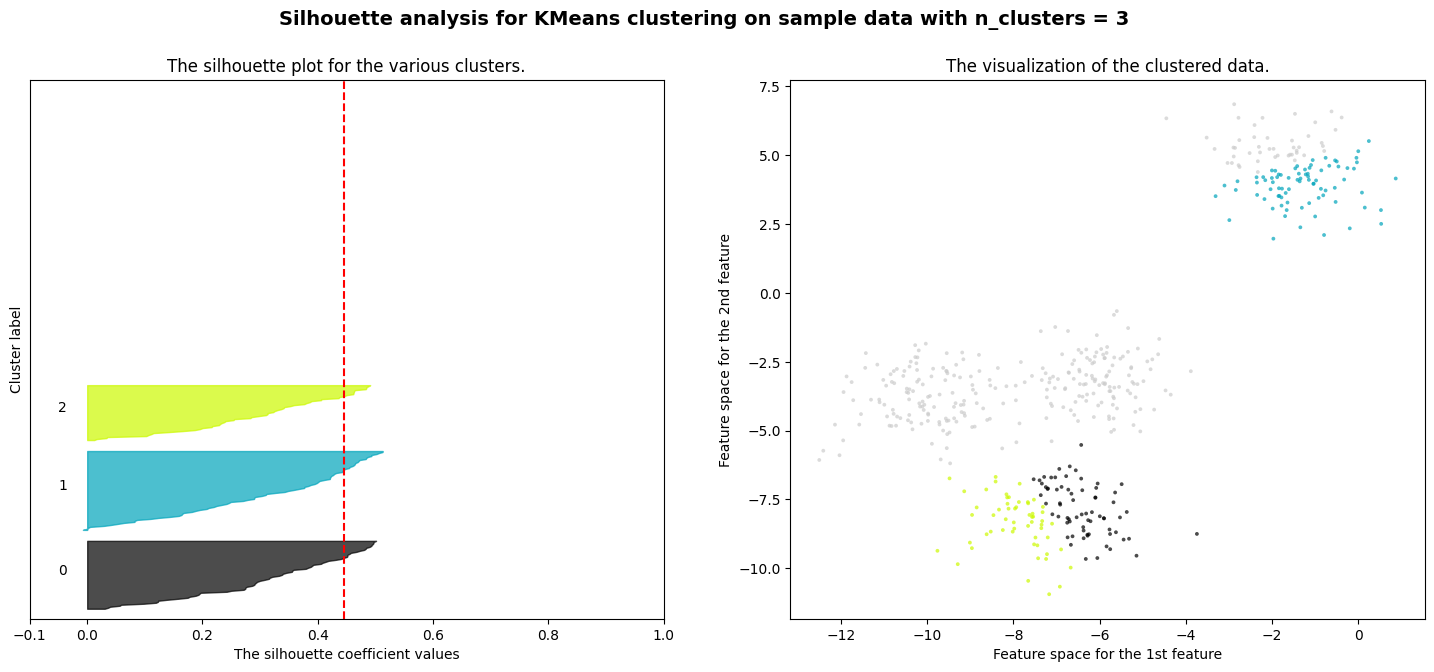

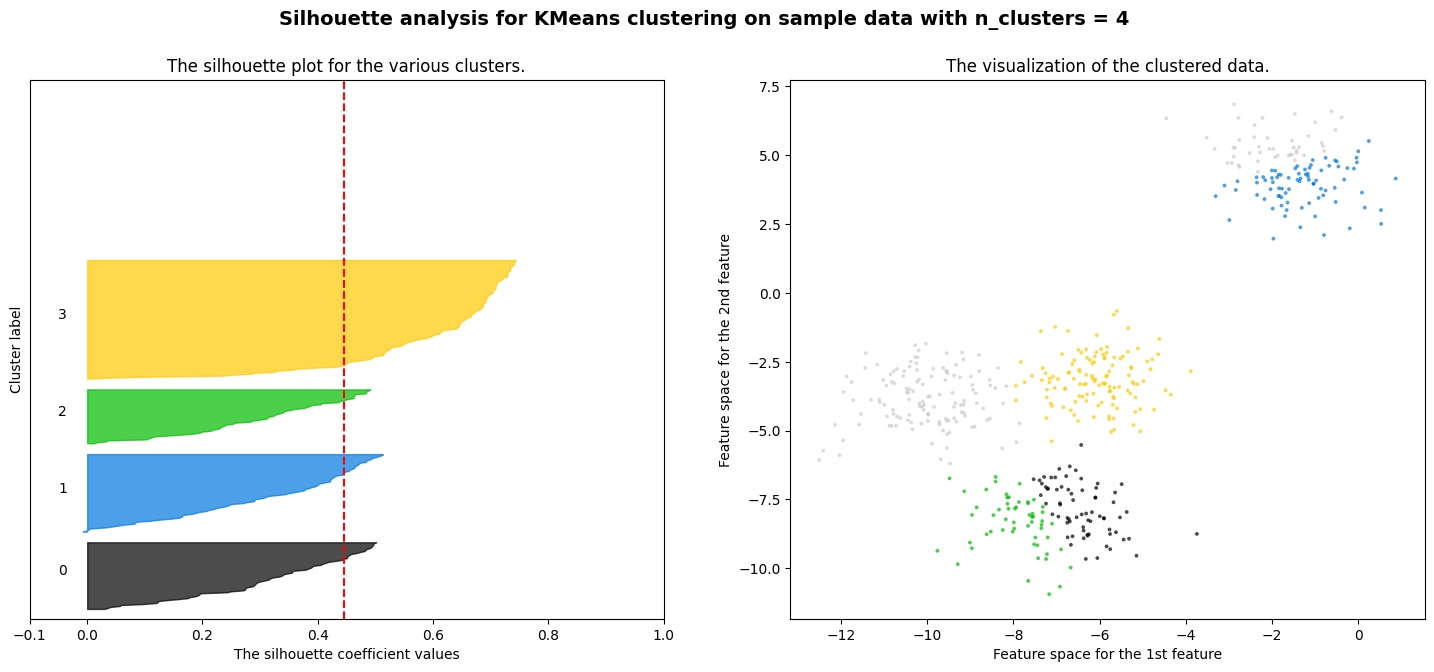

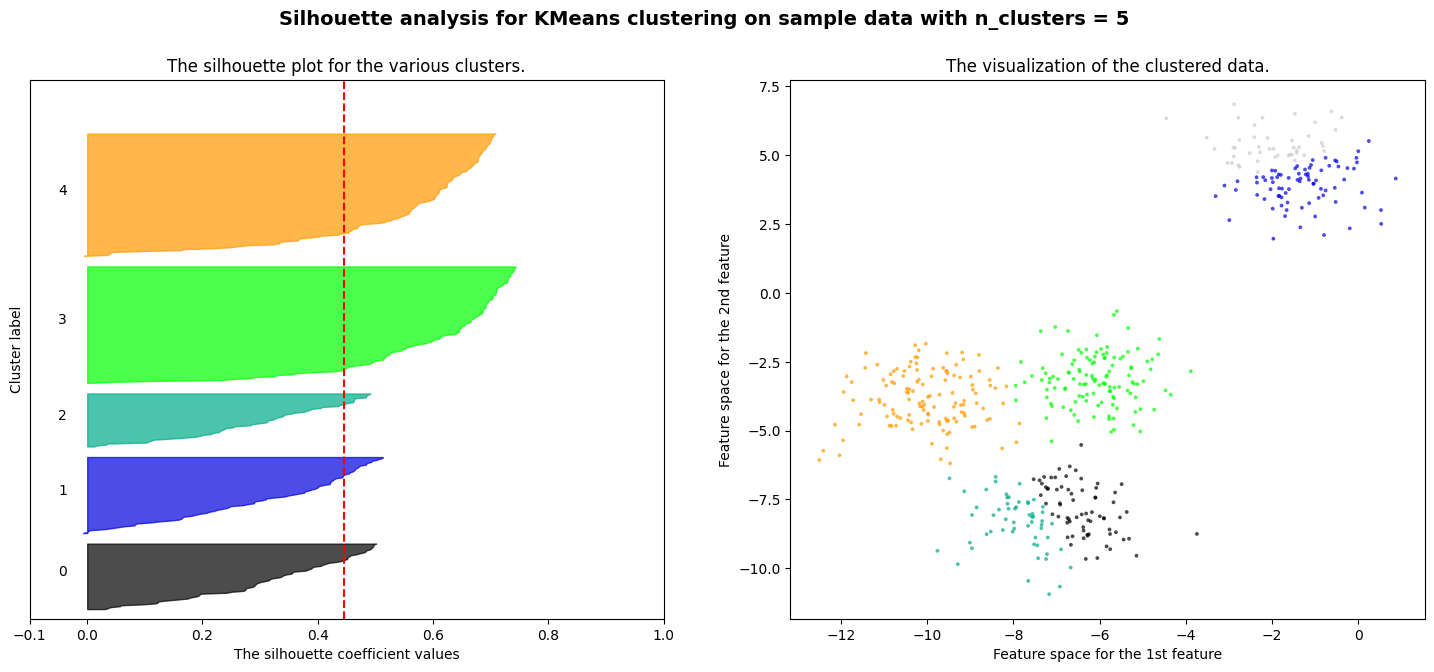

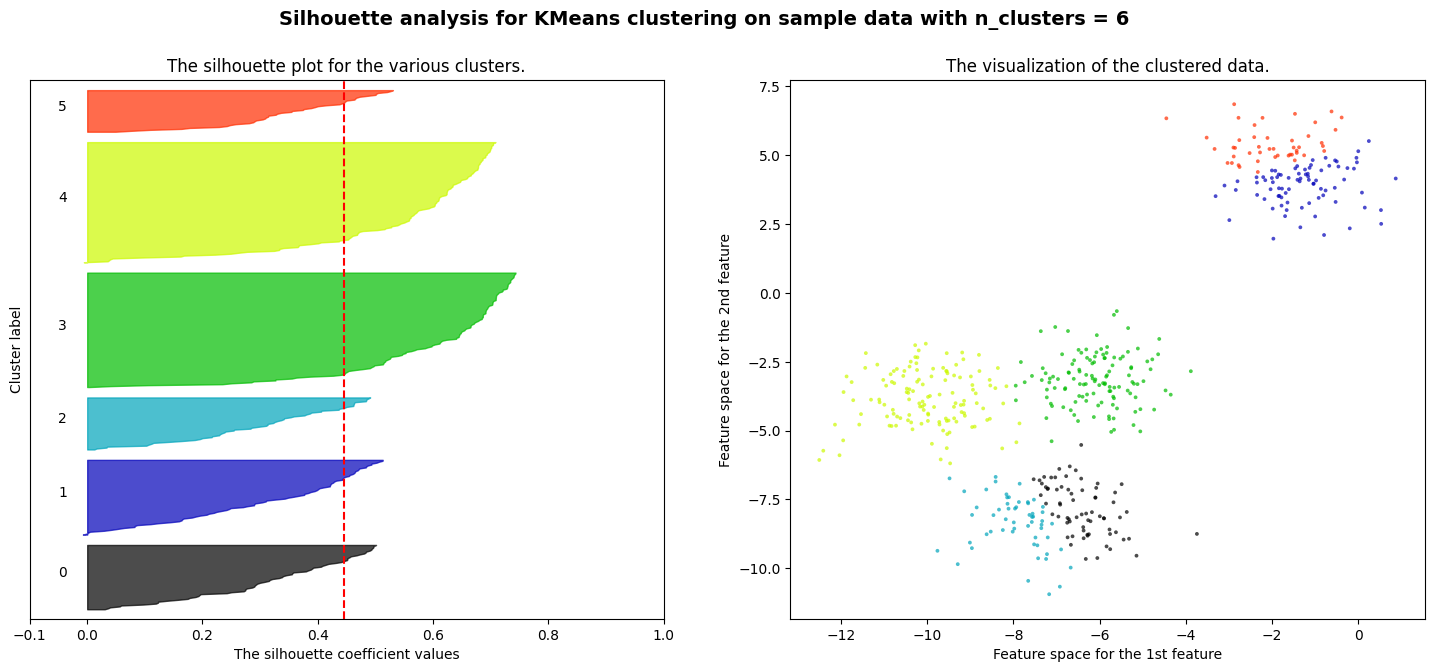

In [5]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = kmedoids.k_medoids()
    #clusterer.fit(X)
    #cluster_labels = clusterer.predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

There is no clear evidence to say that either 5 or 6 are the best K because at some point in both scenarios the sil. coefficient covers all clusters but in the most of the groups most of the points are far of the sil. coefficient.

##6. Scattering different types of data

In [6]:
import numpy as np
from sklearn import cluster, datasets, mixture
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

##### a. Plotting the datasets

Text(0.5, 1.0, 'Blobs with Varied\xa0Variances')

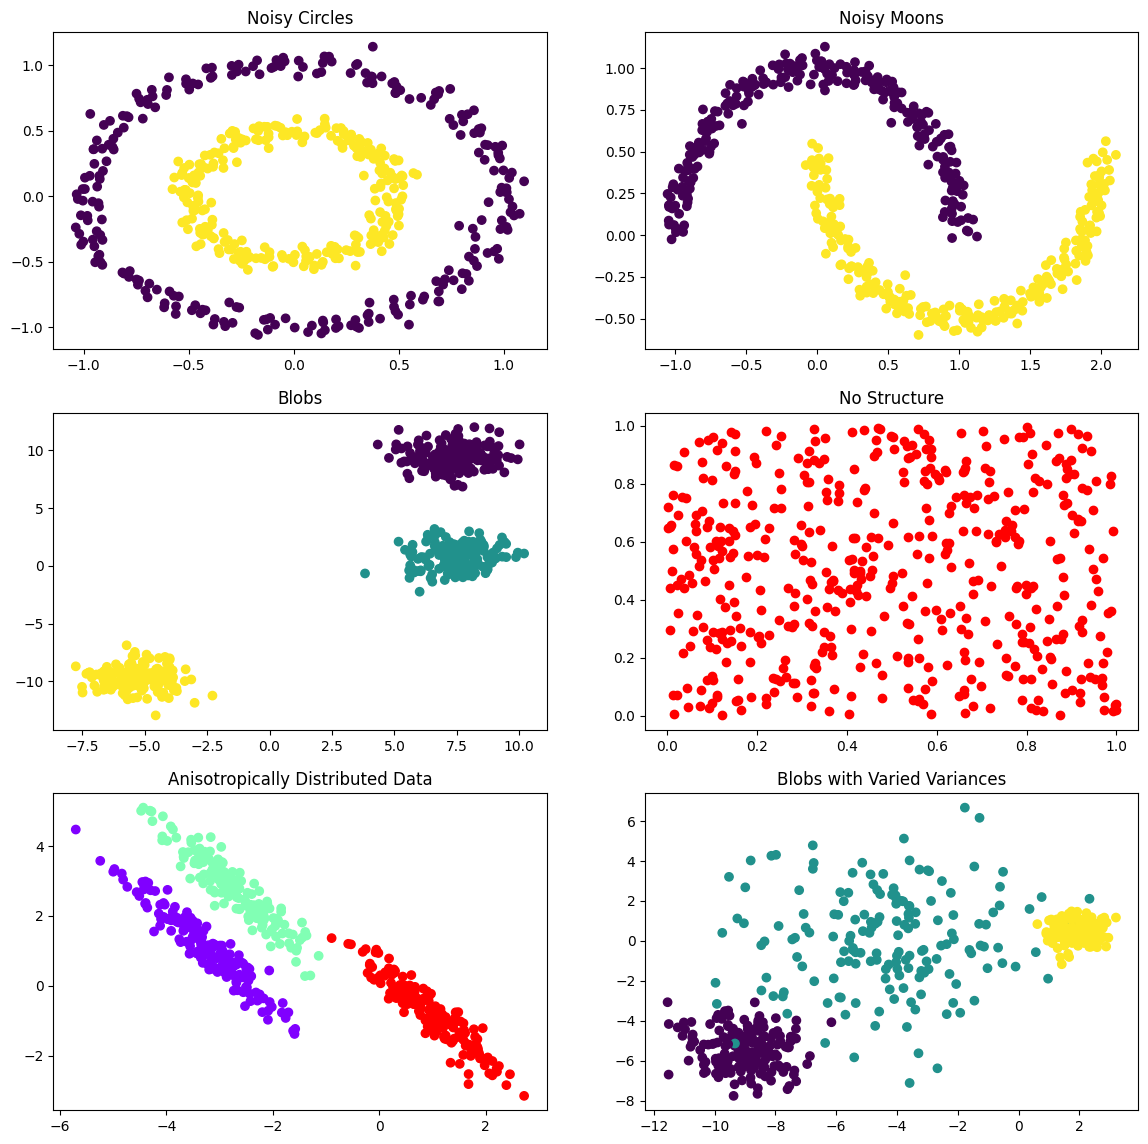

In [13]:
fig, axs = plt.subplots(3, 2, figsize=(14, 14))

# axs[0].figure(figsize=(5, 5))
axs[0,0].scatter(noisy_circles[0][:, 0], noisy_circles[0][:, 1], c=noisy_circles[1])
axs[0,0].set_title('Noisy Circles')

# axs[1].figure(figsize=(5, 5))
axs[0,1].scatter(noisy_moons[0][:, 0], noisy_moons[0][:, 1], c=noisy_moons[1])
axs[0,1].set_title('Noisy Moons')

axs[1,0].scatter(blobs[0][:, 0], blobs[0][:, 1], c=blobs[1])
axs[1,0].set_title('Blobs')

axs[1,1].scatter(no_structure[0][:, 0], no_structure[0][:, 1], c='red')
axs[1,1].set_title('No Structure')

axs[2,0].scatter(aniso[0][:, 0], aniso[0][:, 1], c=aniso[1], cmap='rainbow')
axs[2,0].set_title('Anisotropically Distributed Data')

axs[2,1].scatter(varied[0][:, 0], varied[0][:, 1], c=varied[1])
axs[2,1].set_title('Blobs with Varied Variances')

##### b. Running the models

In [8]:
#Storing datasets to be iterated in a dictionary
data= {'1': blobs[0], '2': X_aniso, '3': varied[0]}

In [9]:
#Installing scikit-learn-extra
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.2 MB/s eta 0:00:00


In [10]:
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
scores= {}

for key in list(data.keys()):
  scoredata= []
  X= data[key]
  clustering = SpectralClustering(n_clusters=2,
                                assign_labels='discretize',
                                random_state=0).fit(X)
  Spectrallabel= clustering.labels_
  scoredata.append(silhouette_score(X, Spectrallabel))

  clustering = DBSCAN(eps=3, min_samples=2).fit(X)
  DBSCANlabel= clustering.labels_

  if len(set(DBSCANlabel)) != 1:
    scoredata.append(silhouette_score(X, DBSCANlabel))
  else: 
    scoredata.append(-9999)

  clustering = KMeans(n_clusters=2).fit(X)
  kmeanslabel= clustering.labels_
  scoredata.append(silhouette_score(X, kmeanslabel))

  clustering = KMedoids(n_clusters=2).fit(X)
  kmediodlabel= clustering.labels_
  scoredata.append(silhouette_score(X, kmediodlabel))

  scores[key]= scoredata

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
scores

{'1': [0.7851727153851467,
  0.8229367222836427,
  0.7851727153851467,
  0.7851727153851467],
 '2': [0.6354933647035526, -9999, 0.6346291254246498, 0.6322189569625475],
 '3': [0.5791134829614283, -9999, 0.6223163248002486, 0.6166504208971609]}

In [12]:
for key, value in scores.items():
  rounded_scores = [round(x, 4) for x in value]
  scores[key] = rounded_scores
print(scores)

{'1': [0.7852, 0.8229, 0.7852, 0.7852], '2': [0.6355, -9999, 0.6346, 0.6322], '3': [0.5791, -9999, 0.6223, 0.6167]}
